In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import seaborn as sns
import torch.nn.functional as f
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import copy

import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

# Creating a model and checking its weights sizes

In [2]:
ann_model = nn.Sequential(nn.Linear(10, 14), nn.Linear(14, 19), nn.Linear(19, 8))

In [3]:
ann_model

Sequential(
  (0): Linear(in_features=10, out_features=14, bias=True)
  (1): Linear(in_features=14, out_features=19, bias=True)
  (2): Linear(in_features=19, out_features=8, bias=True)
)

In [4]:
for i in range(len(ann_model)):
    print(ann_model[i].weight.shape)

torch.Size([14, 10])
torch.Size([19, 14])
torch.Size([8, 19])


In [5]:
n_samples = 5
n_features = 10

data = torch.randn(n_samples, n_features)

In [6]:
ann_model(data).shape

torch.Size([5, 8])

# Weights Initialization

In [7]:
data = np.loadtxt(open("mnist_train_small.csv", "rb"), delimiter=',')

labels = data[:, 0]
data = data[:, 1:]

data_norm = data / np.max(data)

In [8]:
data_tensor = torch.FloatTensor(data)
labels_tensor = torch.LongTensor(labels)

In [9]:
train_data, test_data, train_labels, test_labels = train_test_split(data_tensor, labels_tensor, test_size=0.2, random_state=17)

train_data = TensorDataset(train_data, train_labels)
test_data = TensorDataset(test_data, test_labels)

batch_size = 32
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0])

In [10]:
def creatingModel():
    class Model(nn.Module):
        def __init__(self):
            super().__init__()
            self.input = nn.Linear(784, 64)
            self.fc_1 = nn.Linear(64, 32)
            self.fc_2 = nn.Linear(32, 32)
            self.output = nn.Linear(32, 10)
            
        def forward(self, x):
            x = f.relu(self.input(x))
            x = f.relu(self.fc_1(x))
            x = f.relu(self.fc_2(x))
            return self.output(x)
    
    model = Model()
    
    loss_fun = nn.CrossEntropyLoss()
    
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    
    return model, loss_fun, optimizer

In [11]:
num_epochs = 10

def train_model(temp_model, loss_fun, optimizer):
    losses = torch.zeros(num_epochs)
    train_acc = []
    test_acc = []
    
    for epoch in range(num_epochs):
        batch_acc = []
        batch_loss = []
        
        temp_model.train()
        
        for x, y in train_loader:
            y_hat = temp_model(x)
            
            loss = loss_fun(y_hat, y)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            batch_loss.append(loss.item())
            
            matches = torch.argmax(y_hat, axis=1)==y
            matches_numeric = matches.float()
            accuracy_mean = 100 * torch.mean(matches_numeric)
            batch_acc.append(accuracy_mean)
            
        train_acc.append(np.mean(batch_acc))
        
        losses[epoch] = np.mean(batch_loss)
        
        temp_model.eval()
        x, y = next(iter(test_loader))
        with torch.no_grad():
            test_acc.append(100 * torch.mean((torch.argmax(temp_model(x), axis=1)==y).float()))
        
    return train_acc, test_acc

tensor([[ 0.0066, -0.0384, -0.1114,  ...,  0.0888, -0.0883, -0.0809],
        [ 0.0420,  0.0371, -0.1221,  ...,  0.0311,  0.0463, -0.0895],
        [-0.0469,  0.0151,  0.0536,  ..., -0.0346,  0.0170,  0.0623],
        ...,
        [-0.1072, -0.0902, -0.0945,  ..., -0.0446,  0.1189, -0.0999],
        [-0.0675,  0.0151,  0.0524,  ..., -0.0285,  0.0897, -0.1190],
        [-0.0685,  0.0238,  0.0116,  ..., -0.1183, -0.0297, -0.0115]])


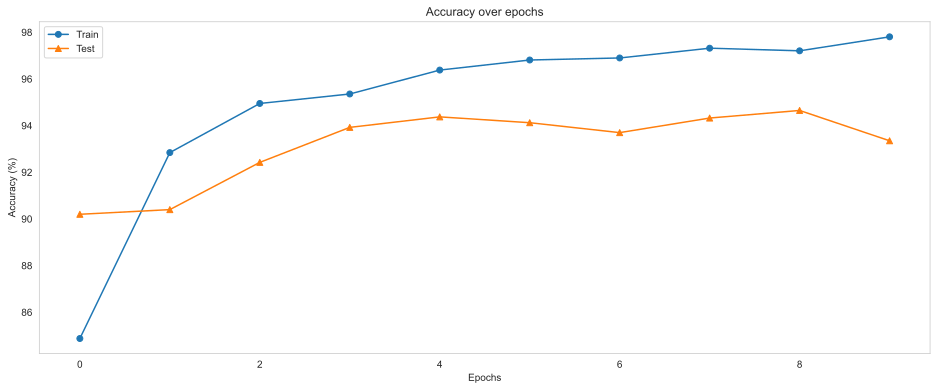

In [12]:
temp_model, loss_fun, optimizer = creatingModel()

print(temp_model.fc_1.weight.data)

train_acc, test_acc = train_model(temp_model, loss_fun, optimizer)

plt.figure(figsize=(16, 6))
plt.plot(range(num_epochs), train_acc, 'o-', range(num_epochs), test_acc, '-^')
plt.legend(["Train", "Test"])
plt.title("Accuracy over epochs")
plt.xlabel("Epochs")
plt.grid()
plt.ylabel("Accuracy (%)");

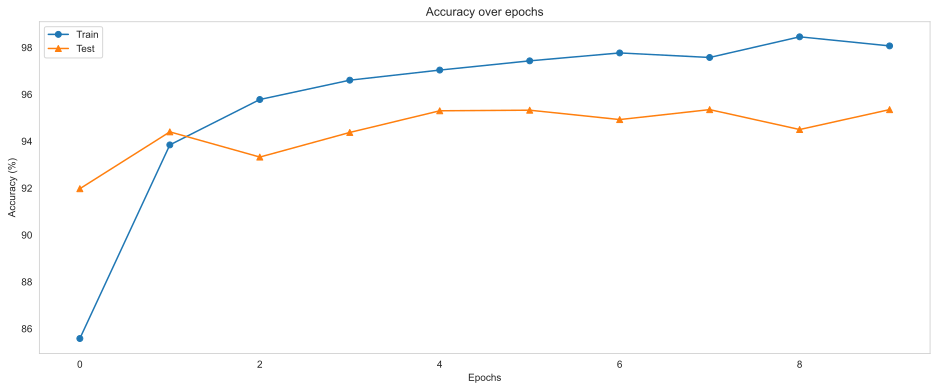

In [13]:
temp_model, loss_fun, optimizer = creatingModel()

temp_model.fc_1.weight.data = torch.zeros_like(temp_model.fc_1.weight)

train_acc, test_acc = train_model(temp_model, loss_fun, optimizer)

plt.figure(figsize=(16, 6))
plt.plot(range(num_epochs), train_acc, 'o-', range(num_epochs), test_acc, '-^')
plt.legend(["Train", "Test"])
plt.title("Accuracy over epochs")
plt.xlabel("Epochs")
plt.grid()
plt.ylabel("Accuracy (%)");

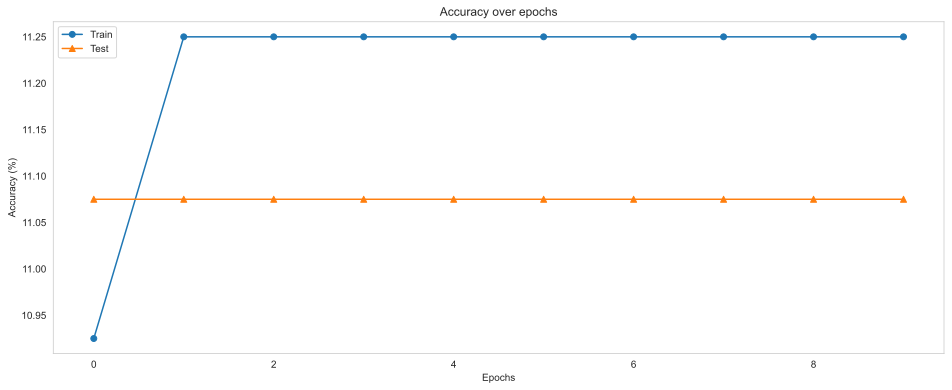

In [14]:
temp_model, loss_fun, optimizer = creatingModel()

for p in temp_model.named_parameters():
    p[1].data = torch.zeros_like(p[1].data)
    
train_acc, test_acc = train_model(temp_model, loss_fun, optimizer)

plt.figure(figsize=(16, 6))
plt.plot(range(num_epochs), train_acc, 'o-', range(num_epochs), test_acc, '-^')
plt.legend(["Train", "Test"])
plt.title("Accuracy over epochs")
plt.xlabel("Epochs")
plt.grid()
plt.ylabel("Accuracy (%)");

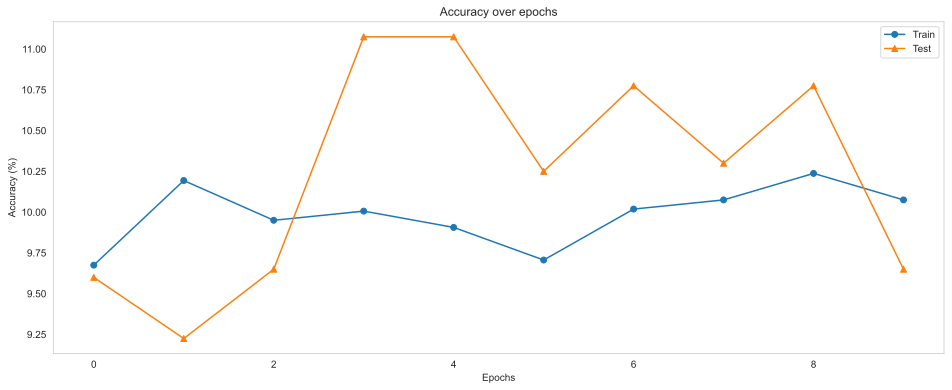

In [15]:
temp_model, loss_fun, optimizer = creatingModel()

for p in temp_model.named_parameters():
    p[1].data = torch.zeros_like(p[1].data) + 1

train_acc, test_acc = train_model(temp_model, loss_fun, optimizer)

plt.figure(figsize=(16, 6))
plt.plot(range(num_epochs), train_acc, 'o-', range(num_epochs), test_acc, '-^')
plt.legend(["Train", "Test"])
plt.title("Accuracy over epochs")
plt.xlabel("Epochs")
plt.grid()
plt.ylabel("Accuracy (%)");

# Initializing the weights with different variance

In [16]:
weights_steps = np.logspace(np.log10(0.0001), np.log10(10), 25)

last_three_acc_test = []
def init_weight(weights):
    temp_model, loss_fun, optimizer = creatingModel()

    for p in temp_model.named_parameters():
        p[1].data = torch.rand_like(p[1].data) * weights
        p[1].data.std = weights

    _, test_acc = train_model(temp_model, loss_fun, optimizer)
    return np.mean(test_acc[-3:])

for weight in weights_steps:
    last_three_acc_test.append(init_weight(weight))

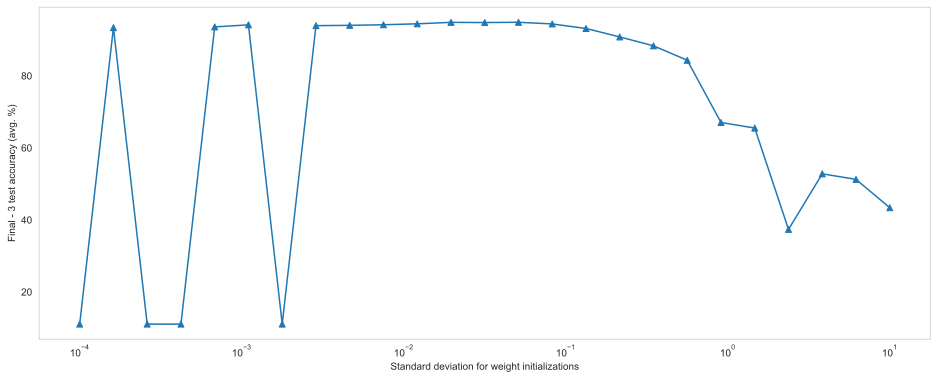

In [17]:
plt.figure(figsize=(16, 6))
plt.plot(weights_steps, last_three_acc_test, '^-')
plt.grid()
plt.xscale('log')
plt.xlabel("Standard deviation for weight initializations")
plt.ylabel("Final - 3 test accuracy (avg. %)");

# Xavier and Kaiming Initializations

In [18]:
all_weight = []
all_biases = []

temp_model_kaiming, loss_fun, optimizer = creatingModel()

for p in temp_model_kaiming.named_parameters():
    if "bias" in p[0]:
        all_biases = np.concatenate((all_biases, p[1].data.numpy().flatten()), axis=0)
    elif "weight" in p[0]:
        all_weight = np.concatenate((all_weight, p[1].data.numpy().flatten()), axis=0)

print(f"There are the total weights in the model : {len(all_weight)}")
print(f"There are the total biases in the model : {len(all_biases)}")

There are the total weights in the model : 53568
There are the total biases in the model : 138


Theoretical Sigma 0.1767766952966369
Empirical Sigma [-0.12251181900501251, 0.11971746385097504]


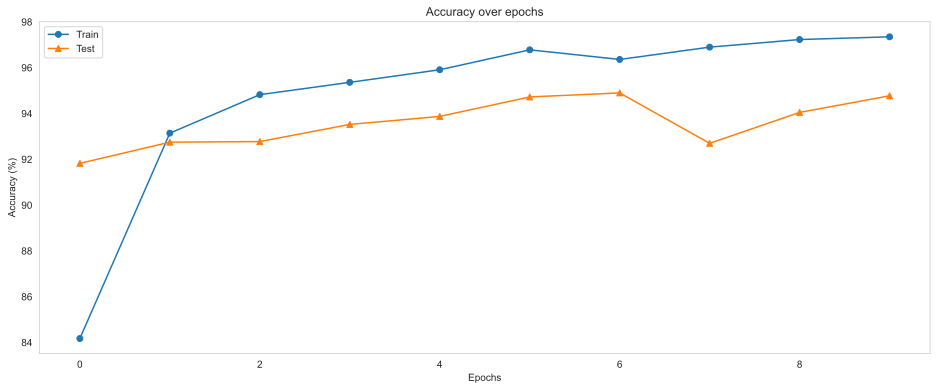

In [19]:
bias_range = [torch.min(temp_model_kaiming.fc_1.bias.data).item(), torch.max(temp_model_kaiming.fc_1.bias.data).item()]
bias_count = len(temp_model_kaiming.fc_1.bias.data)

sigma = np.sqrt(1/bias_count)

print("Theoretical Sigma", str(sigma))
print("Empirical Sigma", str(bias_range))

train_acc, test_acc = train_model(temp_model_kaiming, loss_fun, optimizer)

plt.figure(figsize=(16, 6))
plt.plot(range(num_epochs), train_acc, 'o-', range(num_epochs), test_acc, '-^')
plt.legend(["Train", "Test"])
plt.title("Accuracy over epochs")
plt.xlabel("Epochs")
plt.grid()
plt.ylabel("Accuracy (%)");

In [20]:
temp_model_xavier, loss_fun, optimizer = creatingModel()

for p in temp_model_xavier.named_parameters():
    if "weight" in p[0]:
        nn.init.xavier_normal_(p[1].data)

Theoretically Sigma 0.020833333333333332
Empirical Sigma 0.02120579034090042


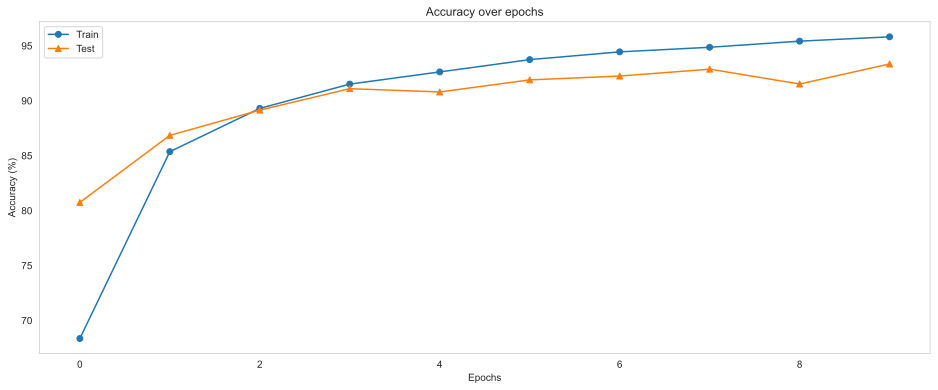

In [21]:
weight_var = torch.var(temp_model_xavier.fc_1.weight.data.flatten()).item()
weight_count = temp_model_xavier.fc_1.in_features + temp_model_xavier.fc_1.out_features

sigma_xavier = 2 / weight_count

print("Theoretically Sigma", str(sigma_xavier))
print("Empirical Sigma", str(weight_var))

train_acc, test_acc = train_model(temp_model_xavier, loss_fun, optimizer)

plt.figure(figsize=(16, 6))
plt.plot(range(num_epochs), train_acc, 'o-', range(num_epochs), test_acc, '-^')
plt.legend(["Train", "Test"])
plt.title("Accuracy over epochs")
plt.xlabel("Epochs")
plt.grid()
plt.ylabel("Accuracy (%)");

# Try on the Wine Dataset

In [22]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

wine_data = pd.read_csv(url, sep=';')

C:\Users\drkum\AppData\Local\Temp\ipykernel_8560\1288462544.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45);


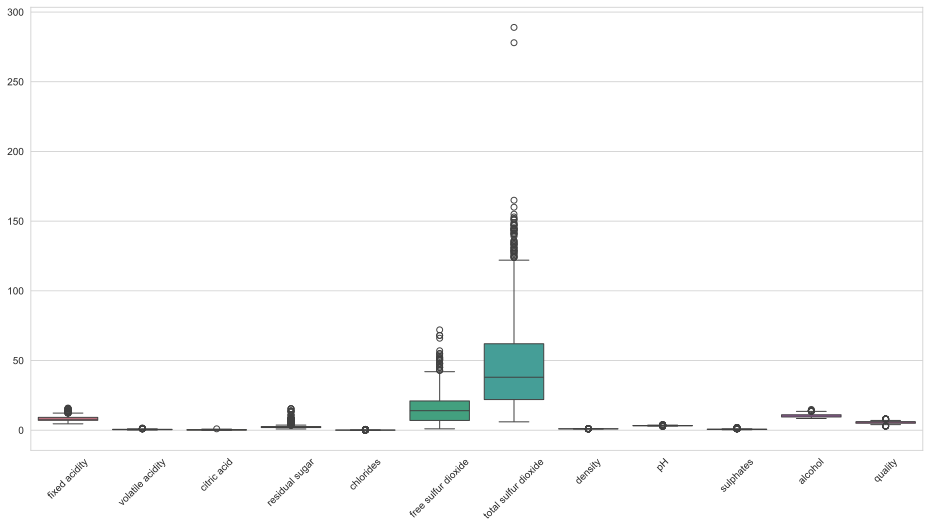

In [23]:
_, ax = plt.subplots(1, figsize=(16, 8))
ax = sns.boxplot(data=wine_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

C:\Users\drkum\AppData\Local\Temp\ipykernel_8560\3743565748.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45);


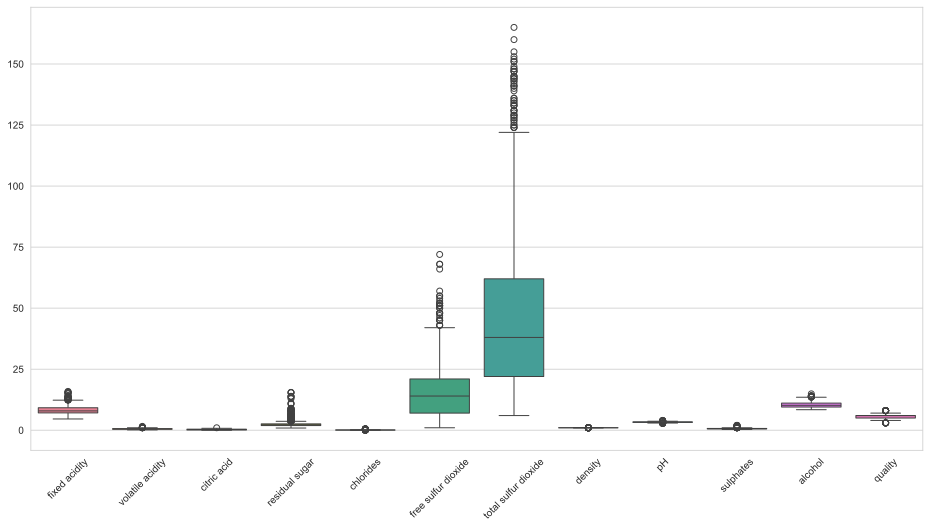

In [24]:
wine_data_normalize = wine_data.copy()
wine_data_normalize = wine_data_normalize[wine_data_normalize['total sulfur dioxide']<200]
_, ax = plt.subplots(1, figsize=(16, 8))
ax = sns.boxplot(data=wine_data_normalize)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [25]:
col_zscore = wine_data_normalize.keys()
col_zscore = col_zscore.drop("quality")
wine_data_normalize[col_zscore] = wine_data_normalize[col_zscore].apply(stats.zscore)

C:\Users\drkum\AppData\Local\Temp\ipykernel_8560\31174841.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45);


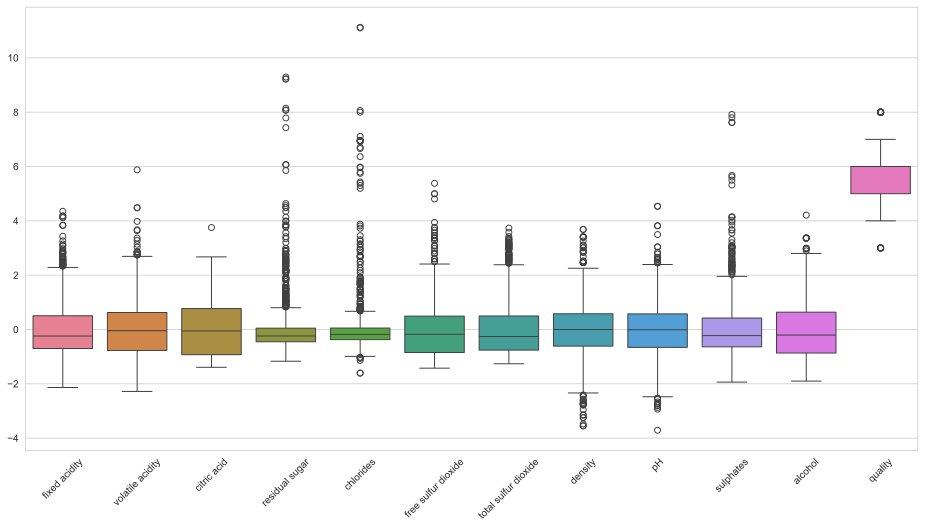

In [26]:
_, ax = plt.subplots(1, figsize=(16, 8))
ax = sns.boxplot(data=wine_data_normalize)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [27]:
wine_data["boolQuantity"] = 0
wine_data["boolQuantity"][wine_data["quality"]>5] = 1

wine_data_normalize["boolQuantity"] = 0
wine_data_normalize["boolQuantity"][wine_data_normalize["quality"]>5] = 1

C:\Users\drkum\AppData\Local\Temp\ipykernel_8560\4210429945.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_data["boolQuantity"][wine_data["quality"]>5] = 1
C:\Users\drkum\AppData\Local\Temp\ipykernel_8560\4210429945.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_data_normalize["boolQuantity"][wine_data_normalize["quality"]>5] = 1


In [28]:
def intoTensor(wine_data):
    data_tensor = torch.tensor(wine_data[col_zscore].values).float()
    label_tensor = torch.tensor(data=wine_data["boolQuantity"].values).float()
    label_tensor = label_tensor[:, None]

    return data_tensor, label_tensor

In [29]:
def splitData(wine_data):
    data_tensor, label_tensor = intoTensor(wine_data)
    train_data, test_data, train_labels, test_labels = train_test_split(data_tensor, label_tensor, test_size=0.1)

    train_data = TensorDataset(train_data, train_labels)
    test_data = TensorDataset(test_data, test_labels)

    train_loader = DataLoader(train_data, shuffle=True, drop_last=True, batch_size=256)
    test_loader = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0])

    return train_loader, test_loader

In [30]:
def wineModel():
    class Model(nn.Module):
        def __init__(self):
            super().__init__()
            self.input = nn.Linear(11, 16)
            self.fc_1 = nn.Linear(16, 32)
            self.output = nn.Linear(32, 1)
        
        def forward(self, x):
            x = f.relu(self.input(x))
            x = f.relu(self.fc_1(x))
            return self.output(x)
    
    annWine = Model()

    loss_fun = nn.BCEWithLogitsLoss()

    optimizer = torch.optim.SGD(annWine.parameters(), lr=0.01)

    return annWine, loss_fun, optimizer

In [31]:
num_epochs = 600

def trainWineModel(wine_data, annWine, loss_fun, optimizer):

    train_loader, test_loader = splitData(wine_data)

    train_acc = []
    test_acc = []
    losses = []

    for epoch in range(num_epochs):

        annWine.train()
        batch_acc = []
        batch_loss = []

        for x, y in train_loader:
            y_hat = annWine(x)

            loss = loss_fun(y_hat, y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            batch_acc.append(100*torch.mean(((annWine(x) > 0) == y).float()).item())
            batch_loss.append(loss.item())
            

        train_acc.append(np.mean(batch_acc))
        losses.append(np.mean(batch_loss))

        annWine.eval()
        x, y  = next(iter(test_loader))
        with torch.no_grad():
            test_acc.append(100*torch.mean(((annWine(x) > 0) == y).float()).item())

    return train_acc, test_acc, losses

In [32]:
annWine_kaiming, loss_fun, optimizer = wineModel()

for p in annWine_kaiming.named_parameters():
    if "weight" in p[0]:
        nn.init.kaiming_normal_(p[1].data, nonlinearity="relu")

train_acc_k, test_acc_k, losses_k = trainWineModel(wine_data_normalize, annWine_kaiming, loss_fun, optimizer)

In [33]:
annWine_xavier, loss_fun, optimizer = wineModel()

for p in annWine_xavier.named_parameters():
    if "weight" in p[0]:
        nn.init.xavier_normal_(p[1].data)

train_acc_x, test_acc_x, losses_x = trainWineModel(wine_data_normalize, annWine_xavier, loss_fun, optimizer)

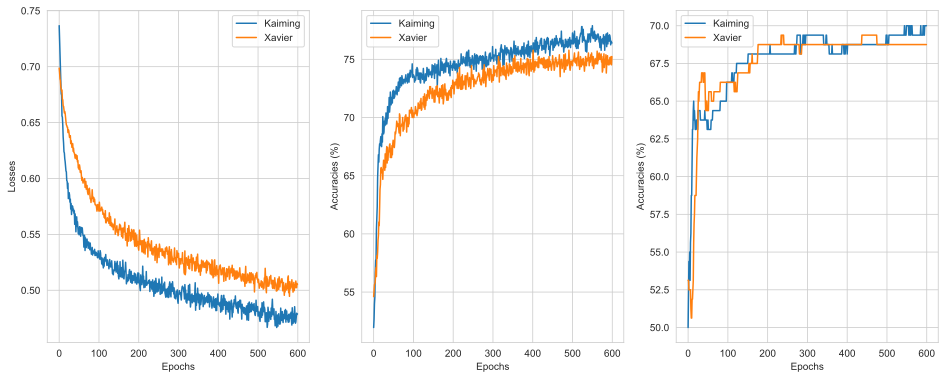

In [34]:
_, ax = plt.subplots(1, 3, figsize=(16, 6))

ax[0].plot(losses_k, label="Kaiming")
ax[0].plot(losses_x, label="Xavier")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Losses")
ax[0].legend()

ax[1].plot(train_acc_k, label="Kaiming")
ax[1].plot(train_acc_x, label="Xavier")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracies (%)")
ax[1].legend()

ax[2].plot(test_acc_k, label="Kaiming")
ax[2].plot(test_acc_x, label="Xavier")
ax[2].set_xlabel("Epochs")
ax[2].set_ylabel("Accuracies (%)")
ax[2].legend();

In [35]:
num_iter = 10

results = np.zeros((num_iter, 3, 2))

for exper in range(num_iter):
    annWine_kaiming, loss_fun, optimizer = wineModel()

    for p in annWine_kaiming.named_parameters():
        if "weight" in p[0]:
            nn.init.kaiming_normal_(p[1].data, nonlinearity="relu")
    
    train_acc_k, test_acc_k, losses_k = trainWineModel(wine_data_normalize, annWine_kaiming, loss_fun, optimizer)

    annWine_xavier, loss_fun, optimizer = wineModel()

    for p in annWine_xavier.named_parameters():
        if "weight" in p[0]:
            nn.init.xavier_normal_(p[1].data)
    
    train_acc_x, test_acc_x, losses_x = trainWineModel(wine_data_normalize, annWine_xavier, loss_fun, optimizer)
    
    results[exper, 0, 0] = np.mean(losses_x[-5:])
    results[exper, 0, 1] = np.mean(losses_k[-5:])
    
    results[exper, 1, 0] = np.mean(train_acc_x[-5:])
    results[exper, 1, 1] = np.mean(train_acc_k[-5:])
    
    results[exper, 2, 0] = np.mean(test_acc_x[-5:])
    results[exper, 2, 1] = np.mean(test_acc_k[-5:])
    
    print(f"Finished Running : {exper+1}/{num_iter}")

Finished Running : 1/10
Finished Running : 2/10
Finished Running : 3/10
Finished Running : 4/10
Finished Running : 5/10
Finished Running : 6/10
Finished Running : 7/10
Finished Running : 8/10
Finished Running : 9/10
Finished Running : 10/10


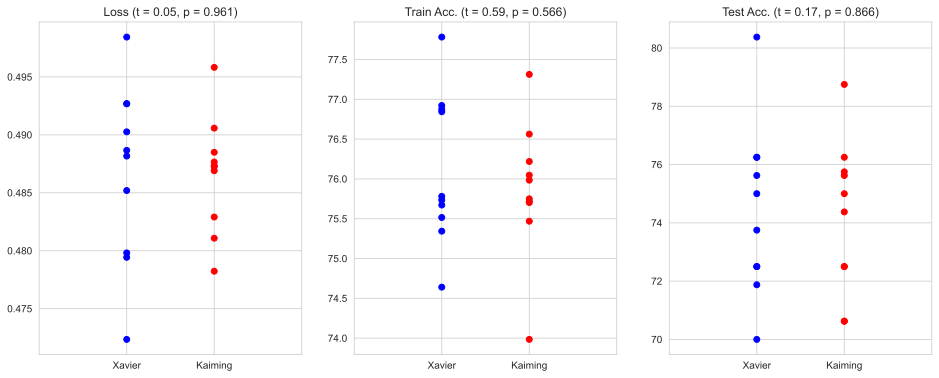

In [36]:
_, ax = plt.subplots(1, 3, figsize=(16, 6))

metric = ["Loss", "Train Acc.", "Test Acc."]

for i in range(3):
    ax[i].plot(np.zeros(num_iter), results[:, i, 0], 'bo')
    ax[i].plot(np.ones(num_iter), results[:, i, 1], 'ro')
    
    t, p = stats.ttest_ind(results[:, i, 0], results[:, i, 1])
    title = '%s (t = %0.2f, p = %0.3f)'%(metric[i], t, p)
    
    ax[i].set_xlim([-1, 2])
    ax[i].set_xticks([0, 1], labels=["Xavier", "Kaiming"])
    ax[i].set_title(title)

plt.show()

# Initialize the Random Weights with different seeds

In [37]:
model = nn.Sequential(nn.Linear(2, 8), nn.Linear(8, 1), nn.Linear(1, 1))

In [38]:
model_noseed = copy.deepcopy(model)

for p in model_noseed.named_parameters():
    if "weight" in p[0]:
        nn.init.xavier_normal_(p[1].data)

In [39]:
model_ran_seed_1 = copy.deepcopy(model)

torch.manual_seed(17)

for p in model_ran_seed_1.named_parameters():
    if "weight" in p[0]:
        nn.init.xavier_normal_(p[1].data)

In [40]:
model_ran_seed_2 = copy.deepcopy(model)

torch.manual_seed(71)

for p in model_ran_seed_2.named_parameters():
    if "weight" in p[0]:
        nn.init.xavier_normal_(p[1].data)